In [1]:
!pip install nlp_utils

     |████████████████████████████████| 112 kB 897 kB/s            


In [2]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt
# Loading necessary libraries

In [3]:
!pip install chatterbot
!pip install chatterbot_corpus

     |████████████████████████████████| 63 kB 603 kB/s            
     |████████████████████████████████| 1.3 MB 1.8 MB/s            
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.28
    Uninstalling SQLAlchemy-1.4.28:
      Successfully uninstalled SQLAlchemy-1.4.28
     |████████████████████████████████| 117 kB 786 kB/s            
     |████████████████████████████████| 270 kB 4.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for PyYAML: filename=PyYAML-3.13-cp37-cp37m-linux_x86_64.whl size=43103 sha256=404f9b9ad76b46c6c58118b406f703f919ca85ee9abc645b5cc988926747c49d
  Stored in directory: /root/.cache/pip/wheels/95/cd/14/899edaa9cdb9a65aa7224539f6e0ad488e9a7b202bb48f6ae6
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the 

In [5]:
f = open("../input/simple-dialogs-for-chatbot/dialogs.txt", "r")
# reading the data 

Converting data to dataframe

In [6]:
df=pd.read_csv('../input/simple-dialogs-for-chatbot/dialogs.txt',names=('Question','Answer'),sep=('\t'))
# Reading the data

In [7]:
df

,Question,Answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


## Data Evaluation

Here we will be using some dataframe attributes to better understand the data and categorize it.

In [8]:
df.shape
# Gives the number of rows and columns in the dataset

(3725, 2)

In [9]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Question', 'Answer'], dtype='object')

In [10]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  3725 non-null   object
 1   Answer    3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [11]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Question,Answer
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [12]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Question    3510
Answer      3512
dtype: int64

In [15]:
df['Answer'].value_counts()
# Counting the values and their representation in "Response" column

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Answer, Length: 3512, dtype: int64

In [14]:
df['Question'].value_counts()
# Counting the values and their representation in "Question" column

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Question, Length: 3510, dtype: int64

## Data Visualization

We employ the use of the NLTK library to carryout tokenization, sentiment analysis, etc.

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
Text=df['Question']

Using the VADER library, we loop through the sentences in the "Question" column to get the polarity scores for :neu:, :pos: and :neg: values

In [31]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(sentence)

In [20]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [21]:
df

,Question,Answer,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


Creating a word cloud of our data

In [22]:
from wordcloud import WordCloud

In [27]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Question.values
    wc= WordCloud(background_color="black",max_words=1200)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Most words in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

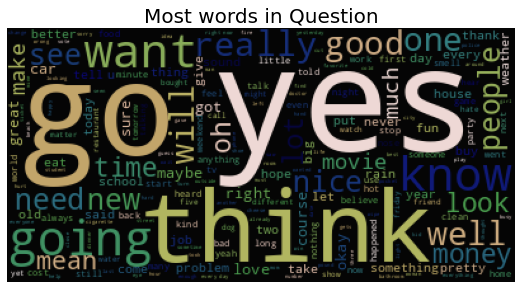

In [28]:
wordcloud(df,'Question')
# top words in the "Question" column

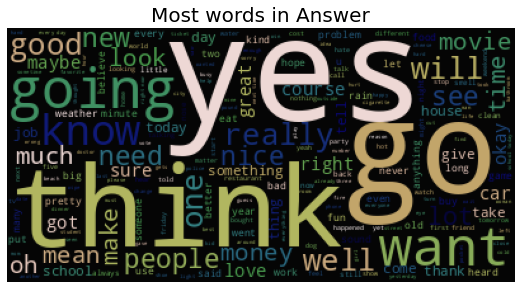

In [30]:
wordcloud(df,'Answer')
# top words in the "Answer" column

## Removing special characters from words

In [32]:
import re
# importing regular expressions

In [33]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [34]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [35]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [36]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values

In [37]:
df['Question'] = df['Question'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column

In [38]:
df['Answer'] = df['Answer'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column

In [39]:
df
# final cleaned dataset

,Question,Answer,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


## Best Sentence
### arranging the compound column in descending order to find the best sentence.

In [42]:
best_sent=df.sort_values(by='compound', ascending=False)

In [43]:
best_sent.head(5)
# printing the first 5 rows

,Question,Answer,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


## Top Positive Sentence
### Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [44]:
pos_sent=df.sort_values(by='pos', ascending=False)

In [45]:
pos_sent.head(5)
# printing the first 5 rows

,Question,Answer,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


## Top Negative Sentence
### Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [46]:
neg_sent=df.sort_values(by='neg', ascending=False)

In [47]:
neg_sent.head(5)

,Question,Answer,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


## Top Neutral Sentence
### Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [48]:
neu_sent=df.sort_values(by='neu', ascending=False)

In [49]:
neu_sent.head(5)

,Question,Answer,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [51]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [52]:
factors = tfidf.fit_transform(df['Question']).toarray()
# changing column into array

In [55]:
tfidf.get_feature_names()
# displaying feature names

['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

# Application

In [57]:
from sklearn.metrics.pairwise import cosine_distances
from nltk.stem import WordNetLemmatizer


In [58]:
lemmatizer = WordNetLemmatizer()

query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = lemmatizer.lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Question']
    response = df.loc[index]['Answer']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [59]:
#Sample
query = 'hi'
response = chatbot(query)
print(response)

{'match': 'hi  how are you doing ', 'response': 'i m fine  how about yourself ', 'score': 0.6806087117553346, 'pos': 0.0, 'neg': 0.0, 'neu': 1.0}
